# IQR (Inter Quartile Range)

IQR (Inter Quartile Range) approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

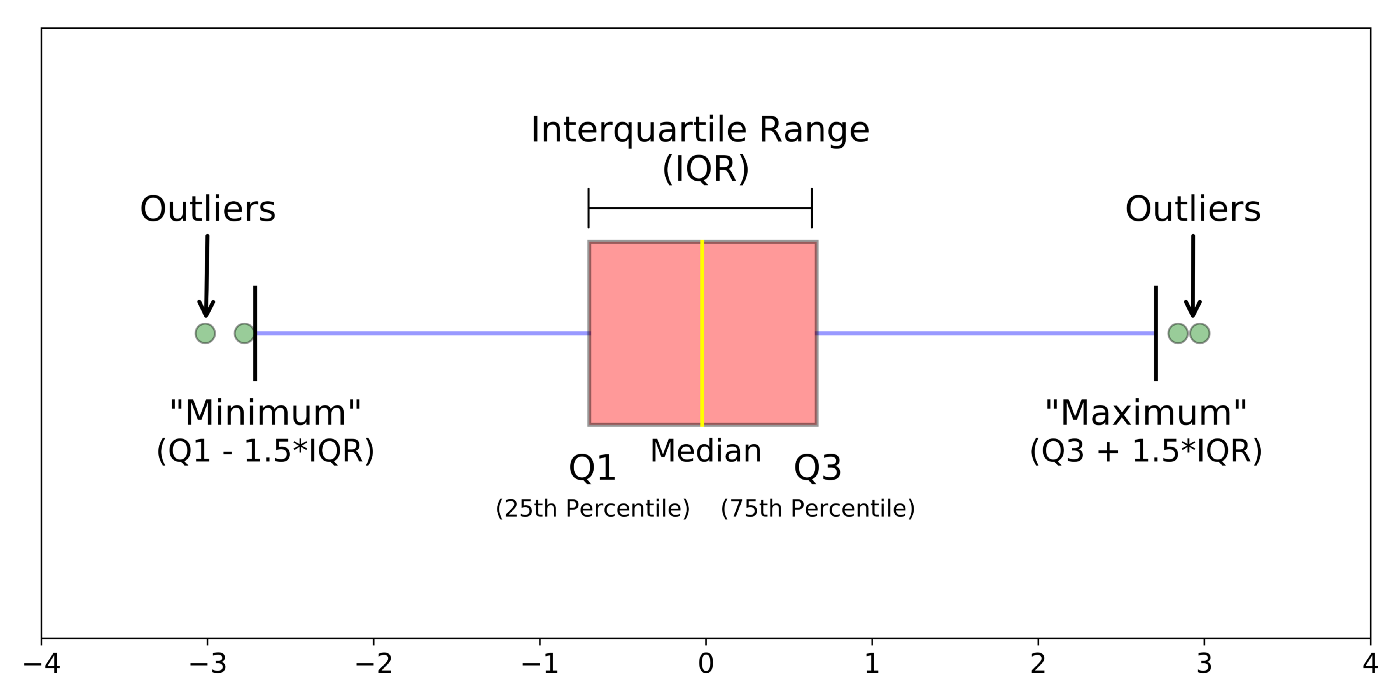

In [23]:
import pandas as pd
import numpy as np

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df1=sns.load_dataset("titanic")


In [28]:
df1.shape

(891, 15)

In [29]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
df1.columns 

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [31]:
df1=df1.drop(columns=['class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']) # we will work dtype is numeric columns

In [32]:
df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [33]:
df1.shape # we have 7 column dtype is object

(891, 8)

In [44]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

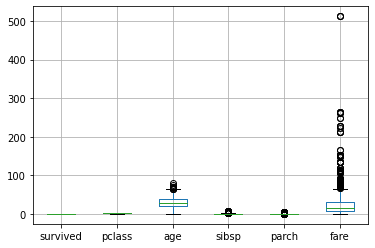

In [46]:
df1.boxplot()

In [77]:
Q1=df1["age"].quantile(0.25)
Q1

20.125

In [78]:
Q3=df1.age.quantile(0.75)
Q3

38.0

In [80]:
IQR=Q3-Q1
IQR

17.875

In [83]:
LL=Q1-1.5*IQR
LL

-6.6875

In [84]:
UL=Q3+1.5*IQR
UL

64.8125

<AxesSubplot:>

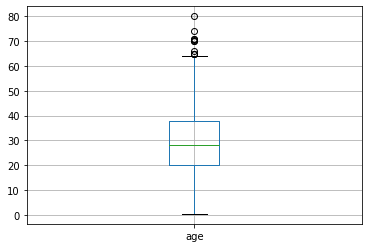

In [34]:
df1.boxplot(column="age")

In [35]:
df1[(df1.age>LL)&(df1.age<UL)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
6,0,1,male,54.0,0,0,51.8625,S
11,1,1,female,58.0,0,0,26.5500,S
15,1,2,female,55.0,0,0,16.0000,S
94,0,3,male,59.0,0,0,7.2500,S
124,0,1,male,54.0,0,1,77.2875,S
152,0,3,male,55.5,0,0,8.0500,S
170,0,1,male,61.0,0,0,33.5000,S
174,0,1,male,56.0,0,0,30.6958,C
195,1,1,female,58.0,0,0,146.5208,C
232,0,2,male,59.0,0,0,13.5000,S


In [36]:
df2=sns.load_dataset("diamonds")
df2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
42421,0.51,Premium,G,SI1,62.4,58.0,1312,5.13,5.07,3.18
42422,0.51,Good,G,SI1,63.6,55.0,1312,5.06,5.03,3.21
42423,0.51,Ideal,G,SI1,63.0,53.0,1312,5.13,5.10,3.22
42424,0.51,Good,F,SI1,63.6,56.0,1312,5.11,5.08,3.24


In [38]:
df2=df3.select_dtypes(include="number") #(2.way) we will work dtype is numeric columns
df2

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
42421,0.51,62.4,58.0,1312,5.13,5.07,3.18
42422,0.51,63.6,55.0,1312,5.06,5.03,3.21
42423,0.51,63.0,53.0,1312,5.13,5.10,3.22
42424,0.51,63.6,56.0,1312,5.11,5.08,3.24


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42426 entries, 0 to 42425
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   42426 non-null  float64
 1   depth   42426 non-null  float64
 2   table   42426 non-null  float64
 3   price   42426 non-null  int64  
 4   x       42426 non-null  float64
 5   y       42425 non-null  float64
 6   z       42425 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.3 MB


<AxesSubplot:xlabel='table'>

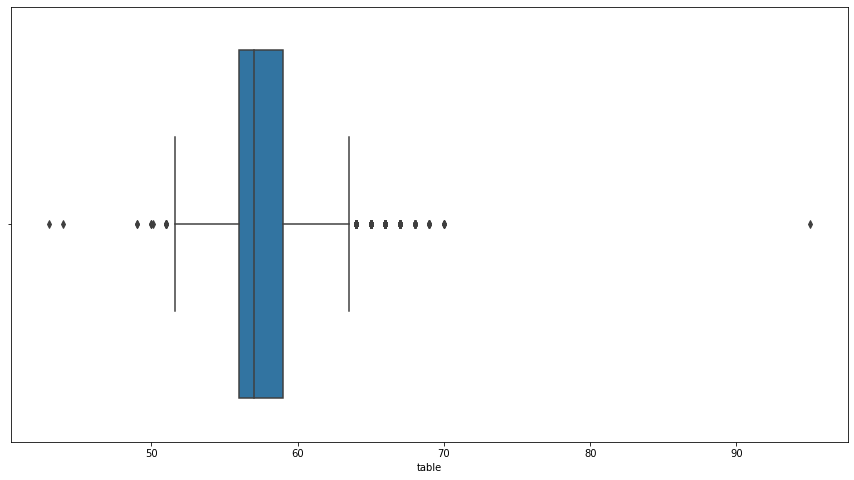

In [79]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df2["table"])

In [43]:
Q1=df2.table.quantile(.25)
Q3=df2.table.quantile(.75)
IQR=Q3-Q1
print("Q1  :",Q1)
print("---"*10)
print("Q3  :",Q3)
print("---"*10)
print("IQR  :",IQR)

Q1  : 56.0
------------------------------
Q3  : 59.0
------------------------------
IQR  : 3.0


In [44]:
df2.table.describe()

count    42426.000000
mean        57.487666
std          2.210463
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [45]:
LL=Q1-1.5*IQR
LL

51.5

In [97]:
lower=df2.table.quantile(0.01)
lower

53.0

In [46]:
UL=Q3+1.5*IQR
UL

63.5

In [95]:
upper=df2.table.quantile(0.99)
upper

63.0

In [47]:
df2_new=df2[(df2.table>LL)&(df2.table<UL)]

In [48]:
df2_new

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
42421,0.51,62.4,58.0,1312,5.13,5.07,3.18
42422,0.51,63.6,55.0,1312,5.06,5.03,3.21
42423,0.51,63.0,53.0,1312,5.13,5.10,3.22
42424,0.51,63.6,56.0,1312,5.11,5.08,3.24


<AxesSubplot:xlabel='table'>

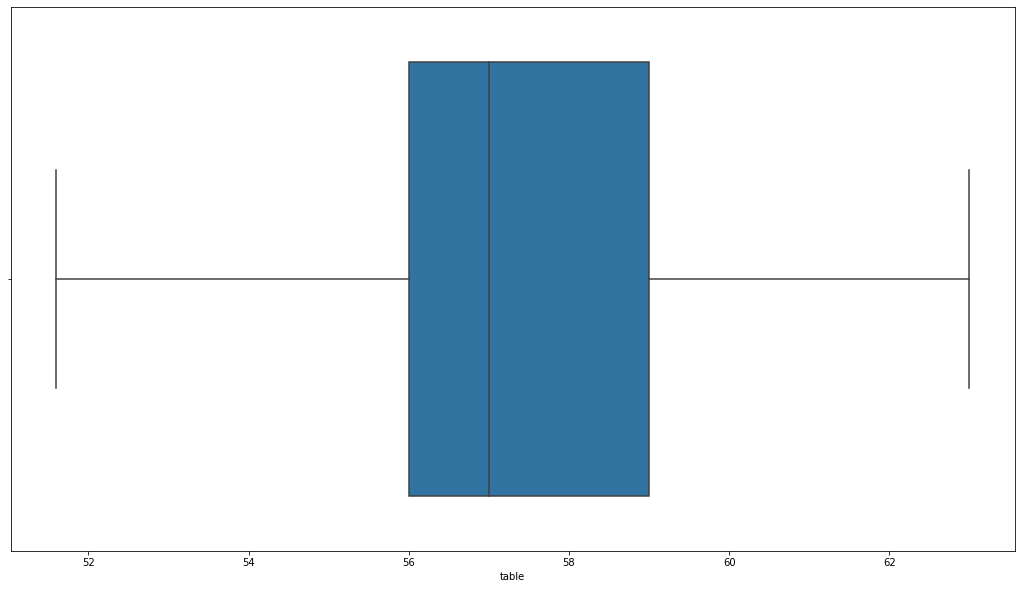

In [50]:
plt.figure(figsize=(18,10))
sns.boxplot(x=df2_new.table)

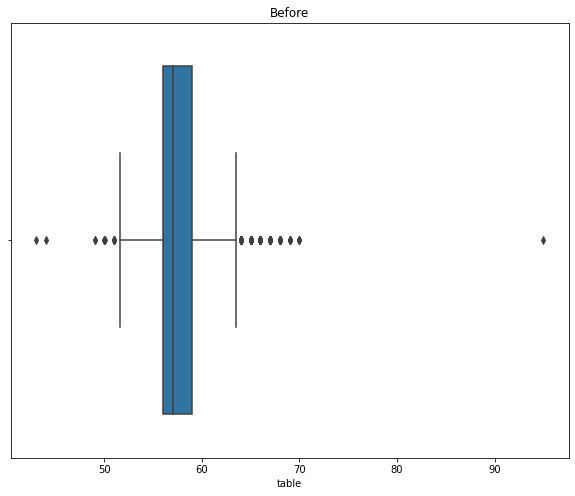

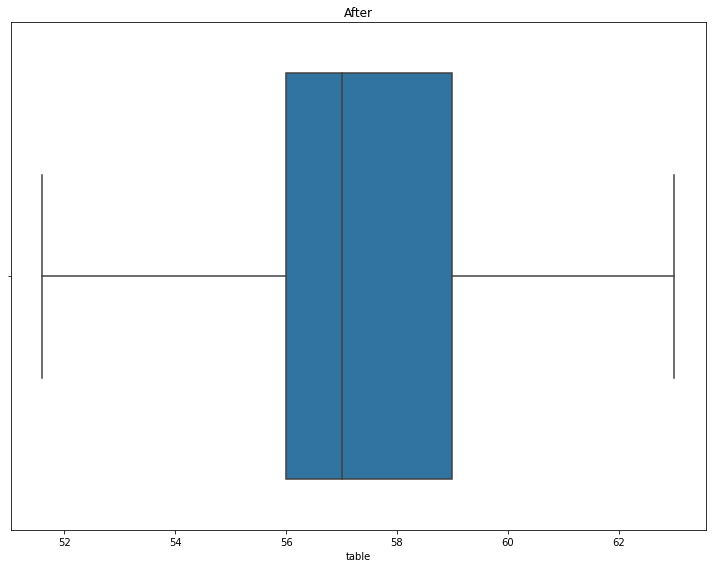

In [88]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df2["table"])
plt.title("Before")
plt.figure(figsize=(10,8))
sns.boxplot(x=df2_new.table)
plt.title("After")
plt.tight_layout()

In [89]:
df3=sns.load_dataset("tips")

In [54]:
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='tip'>

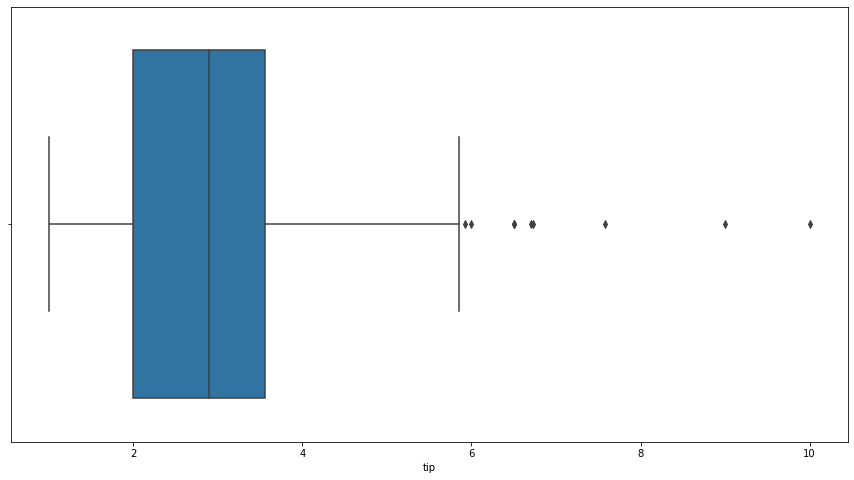

In [75]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df3.tip)

In [91]:
Q1=df3.tip.quantile(0.25)
Q1

2.0

In [92]:
Q3=df3.tip.quantile(0.75)
Q3

3.5625

In [67]:
def traditional_outlier(df,x):
    Q1=df[x].quantile(0.25)
    Q3=df[x].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-1.5*IQR
    UL=Q3+1.5*IQR
    return df[(df[x]>LL)&(df[x]<UL)]

In [68]:
traditional_outlier(df3,"tip")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
df3_new=traditional_outlier(df3,"tip")

<AxesSubplot:xlabel='tip'>

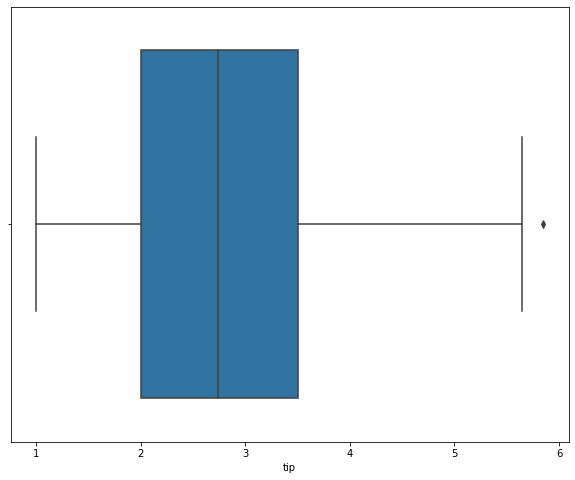

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df3_new.tip)

# Winsorization

If there aren’t extreme outliers, then winsorizing the data will only modify the smallest and largest values slightly. This is generally not a good idea since it means we’re just modifying data values for the sake of modifications.

# Input:

1.  A numeric array whose values at the upper end and the lower end are to be winsorized.

2.  The first argument of the tuple is the percentage of values at the lower end which are to be winsorized.

3.  The second argument of the tuple is the percentage of values at the upper end which are to be winsorized.


# Output:

A numeric array whose values at the upper end and at the lower end are winsorized as defined by the user.

In [98]:
from scipy.stats.mstats import winsorize

In [99]:
df4=sns.load_dataset("diamonds")
df4

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
42421,0.51,Premium,G,SI1,62.4,58.0,1312,5.13,5.07,3.18
42422,0.51,Good,G,SI1,63.6,55.0,1312,5.06,5.03,3.21
42423,0.51,Ideal,G,SI1,63.0,53.0,1312,5.13,5.10,3.22
42424,0.51,Good,F,SI1,63.6,56.0,1312,5.11,5.08,3.24


In [104]:
lower=df4.table.quantile(0.01)
lower

53.0

In [105]:
upper=df4.table.quantile(0.95)
upper

61.0

In [120]:
wins=winsorize(df4.table,(0.02,0.05))

In [121]:
wins

masked_array(data=[55., 61., 61., ..., 54., 56., 54.],
             mask=False,
       fill_value=1e+20)

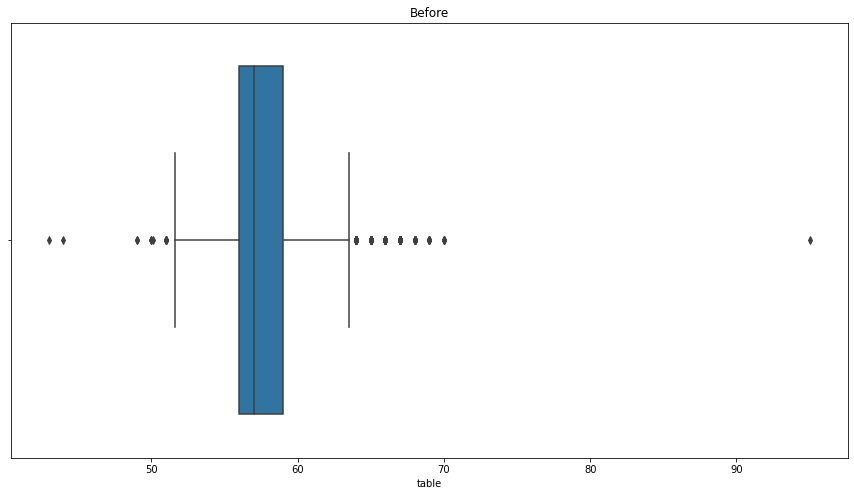

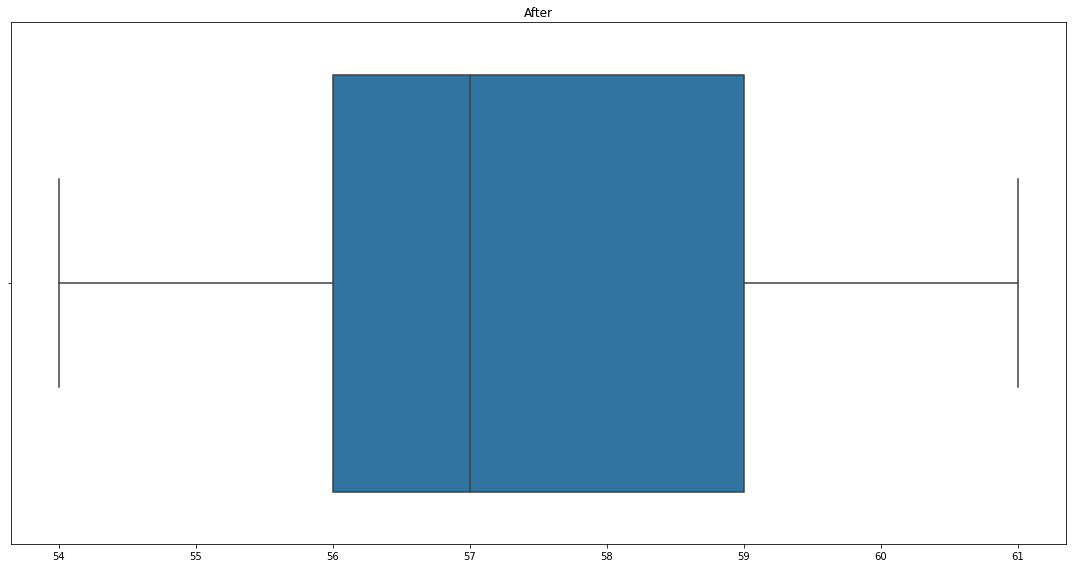

In [124]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df4.table)
plt.title("Before")
plt.figure(figsize=(15,8))
sns.boxplot(x=wins)
plt.title("After")
plt.tight_layout()


In [107]:
a=len(df4.table[df4.table<lower])/len(df4)
a

0.0013670862207137134

In [108]:
b=len(df4.table[df4.table>upper])/len(df4)
b

0.044783858954414744

In [109]:
table_win=winsorize(df4.table,(a,b))

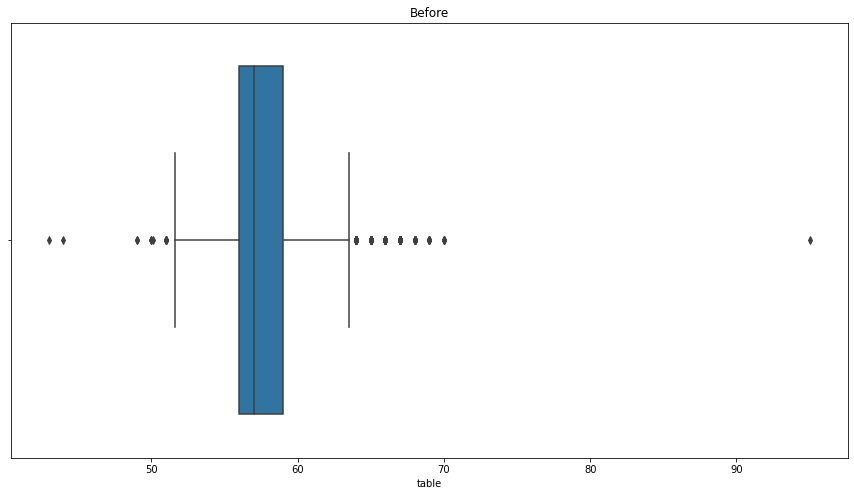

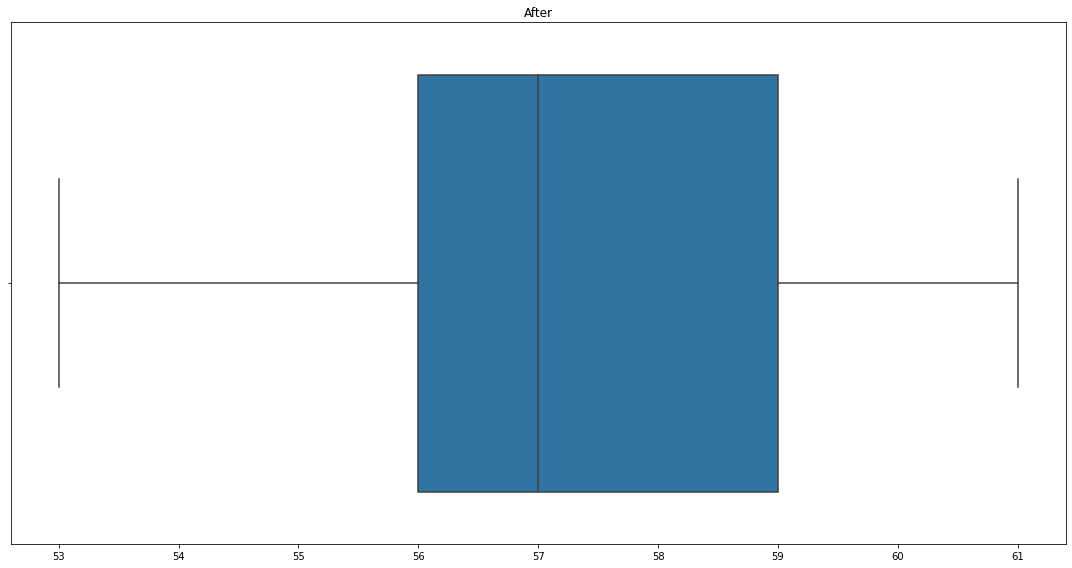

In [112]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df4.table)
plt.title("Before")
plt.figure(figsize=(15,8))
sns.boxplot(x=table_win)
plt.title("After")
plt.tight_layout()